In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
PROCESSED_DATA_DIR = Path("../data/processed/amazon")
MAX_VOCAB_SIZE = 10000

In [3]:
tokenized_descriptions = pd.read_pickle(PROCESSED_DATA_DIR / "tokenized_descriptions.p")
vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE, preprocessor=lambda x: x, tokenizer=lambda x: x)
X = vectorizer.fit_transform(tokenized_descriptions.description.tolist())

In [4]:
X.shape

(108315, 10000)

In [5]:
mapper = umap.UMAP(n_neighbors=15, metric='hellinger', random_state=1)

In [6]:
%%time 
X_umap2 = mapper.fit_transform(X)

CPU times: user 14min 22s, sys: 48 s, total: 15min 9s
Wall time: 13min 27s


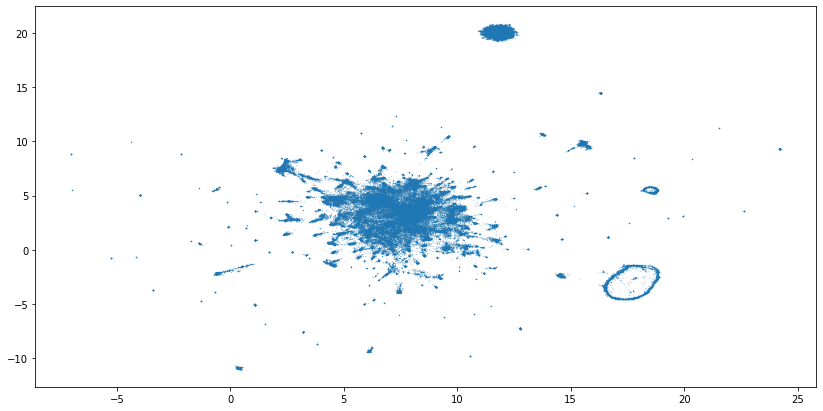

In [7]:
plt.figure(figsize=(14, 7))
plt.scatter(X_umap2[:, 0], X_umap2[:, 1], s=0.01)

In [7]:
X_sample = X[np.random.choice(X.shape[0], 50000, replace=False)]

In [8]:
X_sample.shape

(50000, 10000)

In [9]:
cos_mapper_5 = umap.UMAP(n_neighbors=5, metric='cosine', random_state=1)
X_cos_5 = cos_mapper_5.fit_transform(X_sample)

In [10]:
cos_mapper_15 = umap.UMAP(n_neighbors=15, metric='cosine', random_state=1)
X_cos_15 = cos_mapper_15.fit_transform(X_sample)

In [11]:
hell_mapper_5 = umap.UMAP(n_neighbors=5, metric='hellinger', random_state=1)
X_hell_5 = hell_mapper_5.fit_transform(X_sample)

In [12]:
hell_mapper_15 = umap.UMAP(n_neighbors=15, metric='hellinger', random_state=1)
X_hell_15 = hell_mapper_15.fit_transform(X_sample)

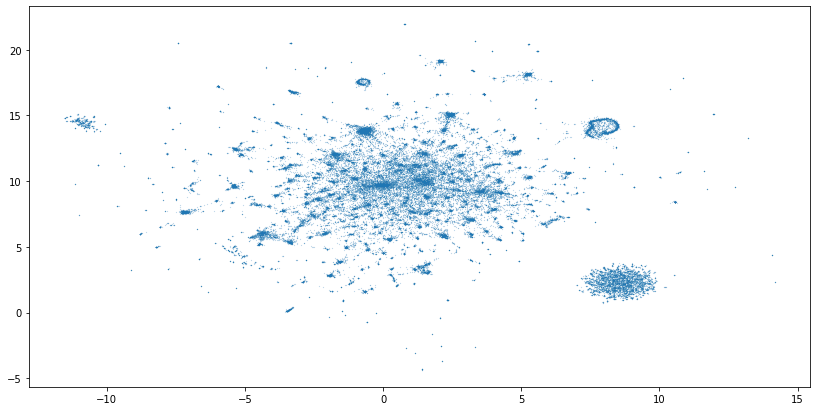

In [13]:
plt.figure(figsize=(14, 7))
plt.scatter(X_cos_5[:, 0], X_cos_5[:, 1], s=0.01)

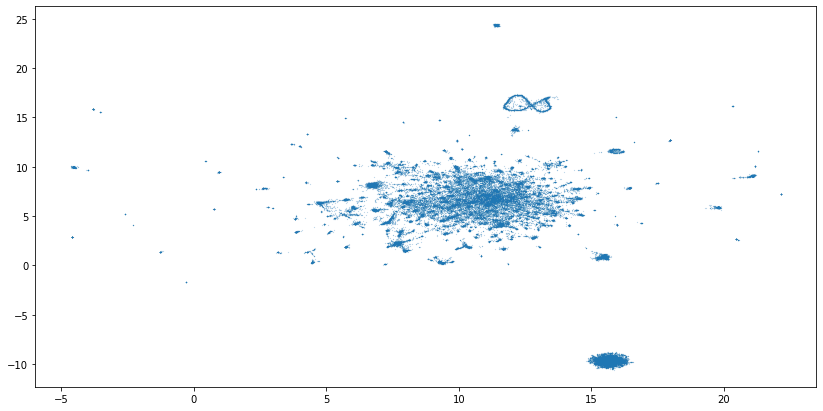

In [14]:
plt.figure(figsize=(14, 7))
plt.scatter(X_cos_15[:, 0], X_cos_15[:, 1], s=0.01)

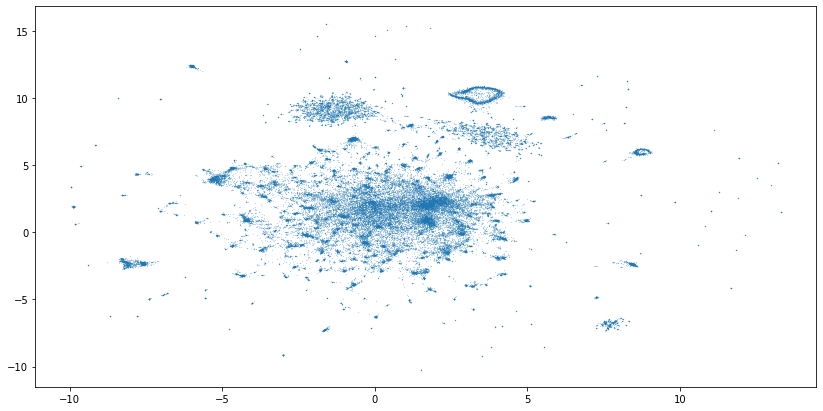

In [15]:
plt.figure(figsize=(14, 7))
plt.scatter(X_hell_5[:, 0], X_hell_5[:, 1], s=0.01)

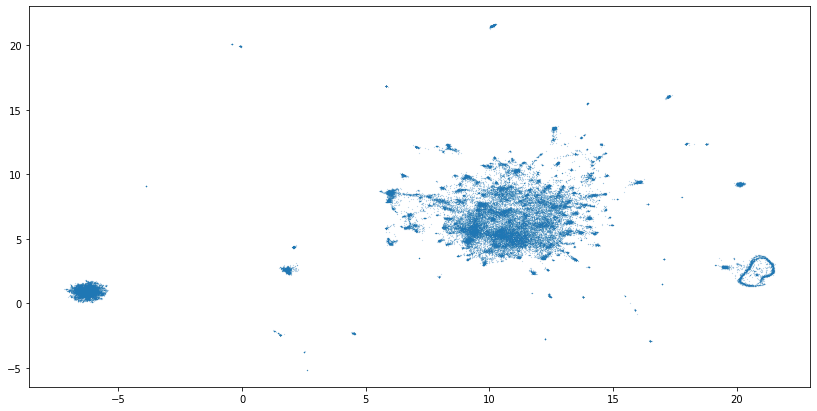

In [16]:
plt.figure(figsize=(14, 7))
plt.scatter(X_hell_15[:, 0], X_hell_15[:, 1], s=0.01)